# Assignment 2 Telco customer churn dataset

In [ ]:
import pandas as pd
import numpy as np # to read the shape of the dataframe
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Read *Telco* data from csv

In [ ]:

file_link = r'https://raw.githubusercontent.com/mimi-1/telco/main/telco.csv'
df = pd.read_csv(file_link)


## Exploration

Exploring Dataset shape and adding new binary column to indicate churn

In [ ]:
df.sample(5)

,CUSTOMER_ID,DATA_KNOWN,GENDER,AGE,TARIFF,DROPPED_CALLS,HANDSET,PEAK_MINS,PEAK_RATE,BILL_PEAK,...,GADGET_A,GADGET_B,GADGET_C,GADGET_D,GADGET_A_REVENUES,GADGET_B_REVENUES,GADGET_C_REVENUES,GADGET_D_REVENUES,HAS_CHURNED,RETENTION
2142,K121430,yes,Female,26.0,CAT 200,1.0,S80,634.0,10.0,63.0,...,F,F,F,F,0.0,0.0,0.0,0.0,No,Yes
16751,K267520,yes,Male,28.0,Play 100,1.0,S80,149.0,25.0,37.0,...,T,T,T,T,9.0,22.0,34.0,38.0,No,Yes
1560,K115610,yes,Male,26.0,CAT 200,2.0,S50,979.0,10.0,98.0,...,T,T,T,T,10.0,22.0,31.0,36.0,No,Yes
8739,K187400,yes,Male,19.0,CAT 200,2.0,ASAD90,1037.0,10.0,104.0,...,T,T,T,T,9.0,20.0,29.0,41.0,Yes,No
25177,K351780,yes,Male,14.0,CAT 100,0.0,S50,360.0,15.0,54.0,...,T,T,T,T,5.0,19.0,31.0,38.0,No,Yes


In [ ]:
##A
df.dtypes

CUSTOMER_ID           object
DATA_KNOWN            object
GENDER                object
AGE                  float64
TARIFF                object
DROPPED_CALLS        float64
HANDSET               object
PEAK_MINS            float64
PEAK_RATE            float64
BILL_PEAK            float64
OFFPEAK_MINS         float64
OFFPEAK_RATE         float64
BILL_OFFPEAK         float64
GADGET_A              object
GADGET_B              object
GADGET_C              object
GADGET_D              object
GADGET_A_REVENUES    float64
GADGET_B_REVENUES    float64
GADGET_C_REVENUES    float64
GADGET_D_REVENUES    float64
HAS_CHURNED           object
RETENTION             object
dtype: object

In [ ]:
# drop the missing values
df = df.dropna()
df.shape

(31754, 23)

In [ ]:
#add binary column to inicate if customer is churned

df['HAS_CHURNED_BIN'] = df.apply(lambda row: True if row['HAS_CHURNED']=='Yes' else False, axis=1)
df.head(3)

,CUSTOMER_ID,DATA_KNOWN,GENDER,AGE,TARIFF,DROPPED_CALLS,HANDSET,PEAK_MINS,PEAK_RATE,BILL_PEAK,...,GADGET_B,GADGET_C,GADGET_D,GADGET_A_REVENUES,GADGET_B_REVENUES,GADGET_C_REVENUES,GADGET_D_REVENUES,HAS_CHURNED,RETENTION,HAS_CHURNED_BIN
0,K100010,yes,Male,46.0,CAT 50,1.0,SOP10,36.0,15.0,5.0,...,F,T,F,0.0,0.0,28.0,0.0,Yes,No,True
1,K100020,yes,Male,27.0,CAT 50,0.0,SOP10,39.0,15.0,6.0,...,F,F,F,11.0,0.0,0.0,0.0,Yes,No,True
2,K100030,yes,Male,39.0,CAT 50,2.0,SOP20,73.0,15.0,11.0,...,T,F,T,8.0,23.0,0.0,35.0,Yes,No,True


Exloring 4 variables we suspect influence customer churn 

In [ ]:
#B Do some statistics on the variable (e.g., compute the mean, median, min, max, std, … etc.)
# and discuss how this will benefit you in analyzing the data.

#We want to analyse variables we suspect influence customer curn the most

var = 'DROPPED_CALLS'
print("SUMMARY FOR ", var)
print("mean: ", df[var].mean())
print("median:", df[var].median())
print("min:", df[var].min())
print("max:", df[var].max())
print("std:", df[var].std())
print("skew: ", df[var].skew())
print("Total:", df[var].sum())
print(" "*3,"--")
var = 'AGE'
print("SUMMARY FOR ", var)
print("mean: ", df[var].mean())
print("median:", df[var].median())
print("min:", df[var].min())
print("max:", df[var].max())
print("std:", df[var].std())
print("skew: ", df[var].skew())
print(" "*3,"--")

cat_var_list = ['HANDSET','TARIFF'] 
for var in cat_var_list:
  print("SUMMARY FOR", df.groupby([var])[var].count().sort_values(ascending=False))
  print(" "*3,"--")



SUMMARY FOR  DROPPED_CALLS
mean:  3.1904641934874345
median: 2.0
min: 0.0
max: 45.0
std: 4.195225155390876
skew:  2.152284744228447
Total: 101310.0
    --
SUMMARY FOR  AGE
mean:  30.33025760534106
median: 28.0
min: 12.0
max: 82.0
std: 12.85805681993958
skew:  0.8286428665543255
    --
SUMMARY FOR HANDSET
S50        7071
BS110      5339
ASAD90     4351
S80        3440
CAS30      2842
WC95       2821
ASAD170    2679
BS210      1391
SOP20       674
SOP10       632
CAS60       506
CAS01         8
Name: HANDSET, dtype: int64
    --
SUMMARY FOR TARIFF
CAT 200     13709
CAT 100      6669
Play 100     5813
Play 300     3575
CAT 50       1988
Name: TARIFF, dtype: int64
    --


Explore all dataset

In [ ]:
#C
#All variables
df.describe(include='all')

,CUSTOMER_ID,DATA_KNOWN,GENDER,AGE,TARIFF,DROPPED_CALLS,HANDSET,PEAK_MINS,PEAK_RATE,BILL_PEAK,...,GADGET_B,GADGET_C,GADGET_D,GADGET_A_REVENUES,GADGET_B_REVENUES,GADGET_C_REVENUES,GADGET_D_REVENUES,HAS_CHURNED,RETENTION,HAS_CHURNED_BIN
count,31754,31754,31754,31754.000000,31754,31754.000000,31754,31754.000000,31754.000000,31754.000000,...,31754,31754,31754,31754.000000,31754.000000,31754.000000,31754.000000,31754,31754,31754
unique,31754,1,2,NaN,5,NaN,12,NaN,NaN,NaN,...,2,2,2,NaN,NaN,NaN,NaN,2,2,2
top,K100010,yes,Female,NaN,CAT 200,NaN,S50,NaN,NaN,NaN,...,F,F,F,NaN,NaN,NaN,NaN,No,Yes,False
freq,1,31754,15887,NaN,13709,NaN,7071,NaN,NaN,NaN,...,18338,18590,18707,NaN,NaN,NaN,NaN,17053,17053,17053
mean,NaN,NaN,NaN,30.330258,NaN,3.190464,NaN,698.530358,15.797852,86.215123,...,NaN,NaN,NaN,3.875228,8.243434,12.222366,16.235403,NaN,NaN,NaN
std,NaN,NaN,NaN,12.858057,NaN,4.195225,NaN,516.608790,6.302586,47.067646,...,NaN,NaN,NaN,4.937973,9.777476,14.615636,19.507165,NaN,NaN,NaN
min,NaN,NaN,NaN,12.000000,NaN,0.000000,NaN,0.000000,10.000000,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,20.000000,NaN,1.000000,NaN,283.000000,10.000000,55.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,28.000000,NaN,2.000000,NaN,602.000000,15.000000,83.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,38.000000,NaN,4.000000,NaN,1009.000000,25.000000,112.750000,...,NaN,NaN,NaN,9.000000,19.000000,29.000000,39.000000,NaN,NaN,NaN


Visualizing 4 variables:

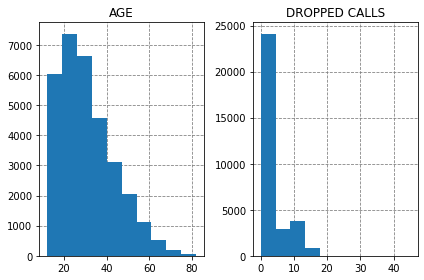

In [ ]:
#Histograms for DROPPED_CALLS and AGE

fig, axs = plt.subplots(1,2)
# fig.suptitle("Histograms")

axs[0].hist(df.AGE)
axs[0].set_title("AGE")
axs[1].hist(df.DROPPED_CALLS)
axs[1].set_title("DROPPED CALLS")

for ax in axs:
  ax.grid(which='major', color='grey', linestyle='--')
  ax.set_axisbelow(True) #Show the grid lines behind the histogram
  ax.grid(which='major', color='grey', linestyle='--')

fig.tight_layout()

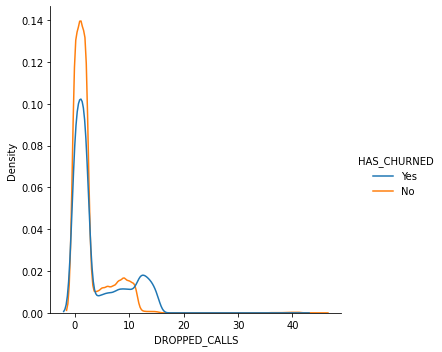

In [ ]:
sns.displot(df, x="DROPPED_CALLS", hue="HAS_CHURNED", kind="kde")

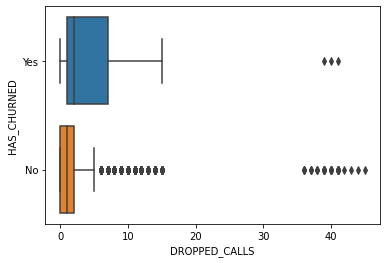

In [ ]:
sns.boxplot(y = df['HAS_CHURNED'],
            x = df['DROPPED_CALLS'])

We can see that churned customers  have more dropped calls than thouse who stayed. There are more outliers though with 35 and more dropped calles who stayed.


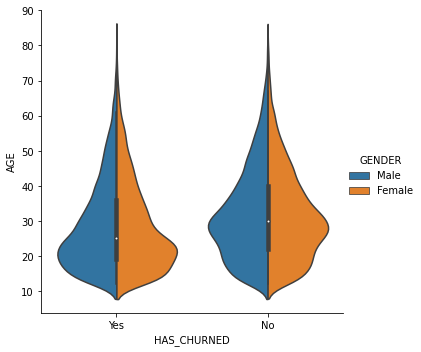

In [ ]:
sns.catplot(data=df, x="HAS_CHURNED", y="AGE", hue="GENDER", kind="violin",split=True)

While there is no difference for gender, looks like younger customers are dropping more than mature people.Compare the medians and look at the distribution of "weight".

```
# This is formatted as code
```



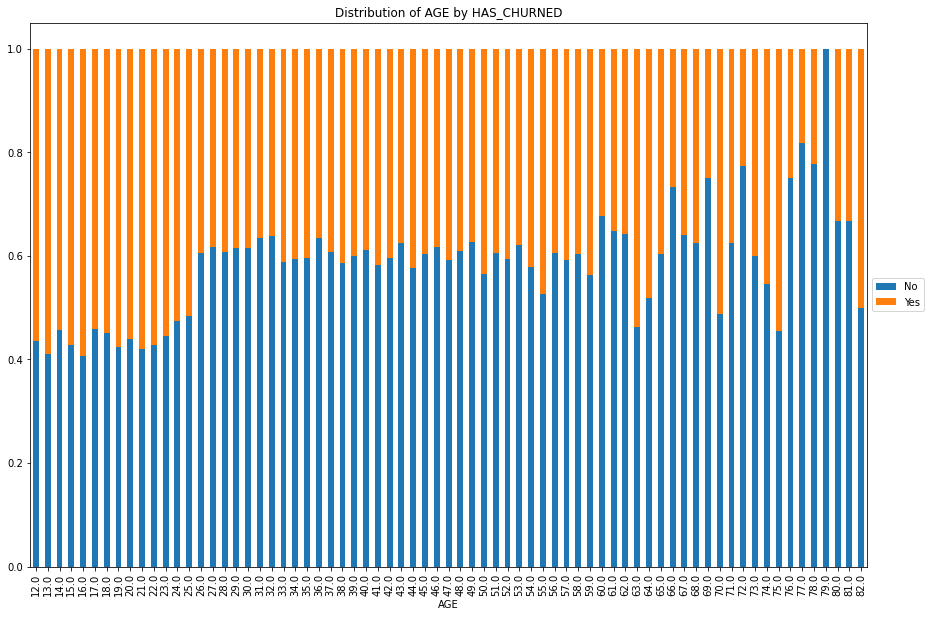

In [ ]:
tb1 = pd.crosstab(df.HAS_CHURNED,df.AGE)
probTb1 = tb1 / tb1.sum()
# plot the ratios in a stacked bar chart 
probTb1
ax = probTb1.transpose().plot(kind='bar', stacked=True,figsize=(15, 10))
plt.title('Distribution of AGE by HAS_CHURNED')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We can see that the distribution of HAS_CHURNED looks like for ages  12 to 25 approximately the same , then 26 - 60, 60 -76 and 77-82 and, so on. We can try grouping by age to reduce rows. Hey professor, give me comment on this one.

In [ ]:
# Explore AGE by categories
import warnings
warnings.filterwarnings("ignore") #suppressing wornings

df.drop('AGE_bin', axis=1, errors='ignore')
range_min = int(df.AGE.min()-1)
range_max = int(df.AGE.max())
step = int((range_max - range_min)/10)
# df['AGE_bin'] = pd.cut(df.AGE, range(range_min, range_max ,step), labels=False) 
df['AGE_bin'] = pd.cut(df.AGE, bins=[12,25,60,76,82], labels=["12-25","26-60","60-70","70-82"]) #Different age group arbitrary 

# print(df.AGE_bin.describe())
# df[['AGE_bin','AGE']].head(9)

#Amount of churned and not churned in each age group 
# df.groupby(['AGE_bin', 'HAS_CHURNED']).AGE.count() 
print("Count of churned customers by age category")
pd.pivot_table(df,values=['AGE'], index=['AGE_bin'],columns=['HAS_CHURNED'], aggfunc={"AGE":np.count_nonzero}, margins=True)

Count of churned customers by age category


AGE              
HAS_CHURNED     No    Yes    All
AGE_bin                         
12-25         5593   7086  12679
26-60        10645   6896  17541
60-70          468    299    767
70-82           28      8     36
All          16734  14289  31023

In [ ]:
# Eyeballing outliers in DROPPED_CALLS column, they hasnt churned

df[["CUSTOMER_ID","AGE","GENDER","TARIFF","HANDSET", "DROPPED_CALLS","HAS_CHURNED"]].sort_values(by='DROPPED_CALLS',ascending=False, ignore_index=True).head(15)

,CUSTOMER_ID,AGE,GENDER,TARIFF,HANDSET,DROPPED_CALLS,HAS_CHURNED
0,K383900,40.0,Male,Play 100,CAS60,45.0,No
1,K395990,21.0,Male,Play 300,CAS60,44.0,No
2,K386070,14.0,Female,Play 100,CAS60,43.0,No
3,K378780,45.0,Male,Play 100,CAS60,42.0,No
4,K379510,38.0,Male,Play 100,CAS60,41.0,No
5,K394060,17.0,Male,Play 300,CAS60,41.0,No
6,K390280,45.0,Female,Play 300,CAS60,41.0,No
7,K390290,15.0,Female,Play 300,CAS60,41.0,No
8,K391730,25.0,Male,Play 300,CAS60,41.0,Yes
9,K389450,46.0,Female,Play 300,CAS60,41.0,No


Analysing categorical variables

In [ ]:
#compare amount of thouse who has churned and who stayed by handset type
handset_tb=pd.crosstab(df.HAS_CHURNED, df.HANDSET)
handset_tb

HANDSET,ASAD170,ASAD90,BS110,BS210,CAS01,CAS30,CAS60,S50,S80,SOP10,SOP20,WC95
HAS_CHURNED,,,,,,,,,,,,
No,2555,224,2990,989,3,153,476,3922,2980,28,35,2698
Yes,124,4127,2349,402,5,2689,30,3149,460,604,639,123


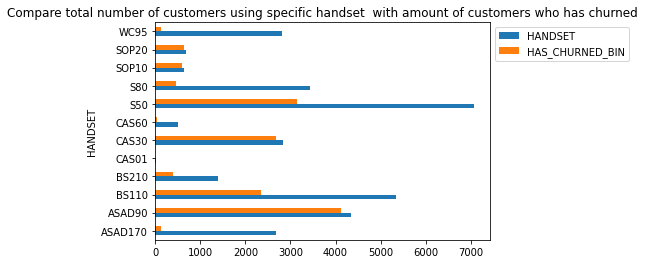

In [ ]:
count_handset = df.groupby('HANDSET')["HANDSET"].count()
count_churned = df.groupby('HANDSET')["HAS_CHURNED_BIN"].sum()
handset_df = pd.concat([count_handset, count_churned], axis=1)
#print(handset_df)
ax = handset_df.plot(kind='barh')
ax.set_title('Compare total number of customers using specific handset  with amount of customers who has churned')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.9))
plt.show()

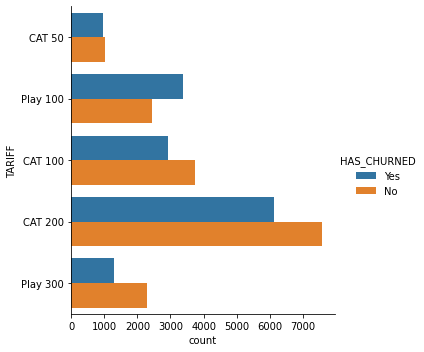

In [ ]:
#Compare the Churned and not_churned Castomers by tariffs they used
sns.catplot(
    data=df, y="TARIFF", hue="HAS_CHURNED", kind="count")

##Analysis of the full dataset to find correlation and reduce the dimensinality

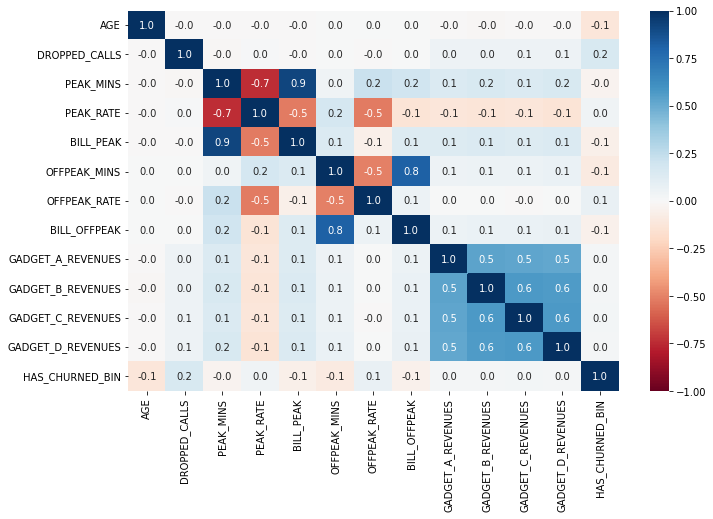

In [ ]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True , fmt =".1f", cmap="RdBu", center=0, ax=ax,vmin=-1,
vmax =1)

In [ ]:
# plt.scatter(df.PEAK_MINS, df.PEAK_RATE, color='C2', facecolor ='none')
# plt.xlabel('PEAK_MINS'); plt.ylabel('PEAK_RATE')

Scatterplots for correlated variables (BILL_PEAK, PEAK_MINS, PEAK_RATE)



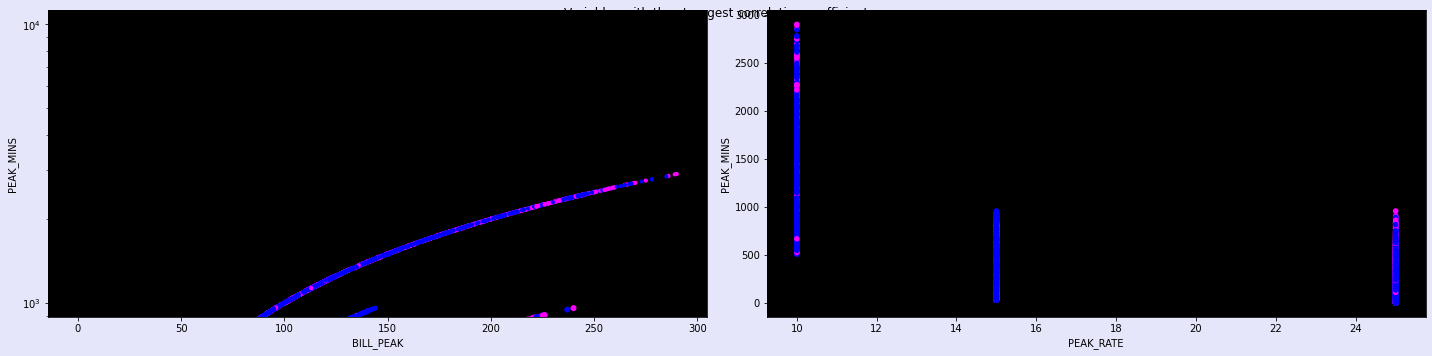

In [ ]:
#peak_mins vs  bill_peak, peak_rate correlation
fig, axes = plt.subplots(nrows =1, ncols =2, figsize =(20,5),facecolor='lavender')
axes[0].set_facecolor('black')
axes[1].set_facecolor('black')
df.plot.scatter( x='BILL_PEAK', y='PEAK_MINS' ,s='PEAK_RATE', logy=True , c=['blue' if c == 1 else 'fuchsia' for c in df.HAS_CHURNED_BIN], ax= axes[0])
#df.plot.scatter( x='BILL_PEAK', y='PEAK_MINS' ,s='PEAK_RATE',c=['blue' if c == 1 else 'fuchsia' for c in df.HAS_CHURNED_BIN], ax= axes[0])
df.plot.scatter( y='PEAK_MINS', x='PEAK_RATE',c=['blue' if c == 1 else 'fuchsia' for c in df.HAS_CHURNED_BIN], ax= axes[1])

fig.suptitle("Variables with the strongest correlation coefficient")
fig.tight_layout()
plt.show()


In [ ]:
# find correlation between 
df1 = df[['BILL_PEAK','PEAK_MINS']]
df1.corr().round(2)

# The two variables are strongly correlated with a negative correlation of 0.69
# So, it is might be possible to reduce the two variables to a single variable without losing too much 
# information. 

,BILL_PEAK,PEAK_MINS
BILL_PEAK,1.00,0.92
PEAK_MINS,0.92,1.00


In [ ]:
df1.cov().round(2) #covariance 

,BILL_PEAK,PEAK_MINS
BILL_PEAK,2215.36,22257.14
PEAK_MINS,22257.14,266884.64


Principal Components Analysis

In [ ]:
# Reduction BILL_PAEK, PEAK_MINS, PEAK_RATE
# from sklearn.decomposition import PCA

pca_peak = PCA(n_components=2)


In [ ]:
pc_peak = pca_peak.fit(df[['BILL_PEAK', 'PEAK_MINS']]) #principal components for peak variables 


In [ ]:
pca_peak.explained_variance_ratio_

array([0.9986744, 0.0013256])

principal component 1(z1) holds almost all information (99.9%)
principal component 2(Z2) holds the res(0.1%)